In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def getDataFrameFromCSV(filePath):
    df = pd.read_csv(filePath + '.csv')
    return df

In [3]:
def createPlot(dataFrame, columnName, plotTitle = ""):
    colValues = dataFrame[columnName]
    dateValues = dataFrame['date']
    ypoints = np.array(colValues)
    xpoints = np.array(dateValues)
    f = plt.figure()
    f.set_figwidth(12)
    f.set_figheight(6)
    plt.plot(xpoints, ypoints, color='green')
    plt.title(plotTitle)
    plt.xlabel("days")
    plt.ylabel("price")
    plt.show()

In [4]:
df = getDataFrameFromCSV('../../data/price_data/rice/rice')

In [5]:
print("Data Types:")
print(df.dtypes)

Data Types:
product_name           object
weight_raw             object
weight_value            int64
weight_unit            object
price_raw              object
price                   int64
discount_price_raw     object
discount_price        float64
date                   object
time                   object
dtype: object


In [6]:
print("Sample Data:")
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
print(df.head(20))

Sample Data:
                              product_name weight_raw  weight_value  \
0                           Chinigura Rice       1 kg             1   
1                     Paijam Rice (Boiled)       1 kg             1   
2           Miniket Rice Standard (Boiled)       5 kg             5   
3            Miniket Rice Premium (Boiled)       5 kg             5   
4   Nazirshail Rice Standard (Half Boiled)       5 kg             5   
5    Nazirshail Rice Premium (Half Boiled)       5 kg             5   
6           Chashi Aromatic Chinigura Rice       1 kg             1   
7           Chashi Aromatic Chinigura Rice       2 kg             2   
8                                Atop Rice       1 kg             1   
9                     Athash Rice (Boiled)       5 kg             5   
10          Miniket Rice Standard (Boiled)      25 kg            25   
11           Miniket Rice Premium (Boiled)      25 kg            25   
12  Nazirshail Rice Standard (Half Boiled)      25 kg           

In [7]:
def showLineGraph(dataFrame, item, weight):
    df = dataFrame
    itemName = item
    filteredDf = df.loc[(df.product_name == itemName) & (df.weight_value == weight)]
    createPlot(filteredDf, 'price', itemName)

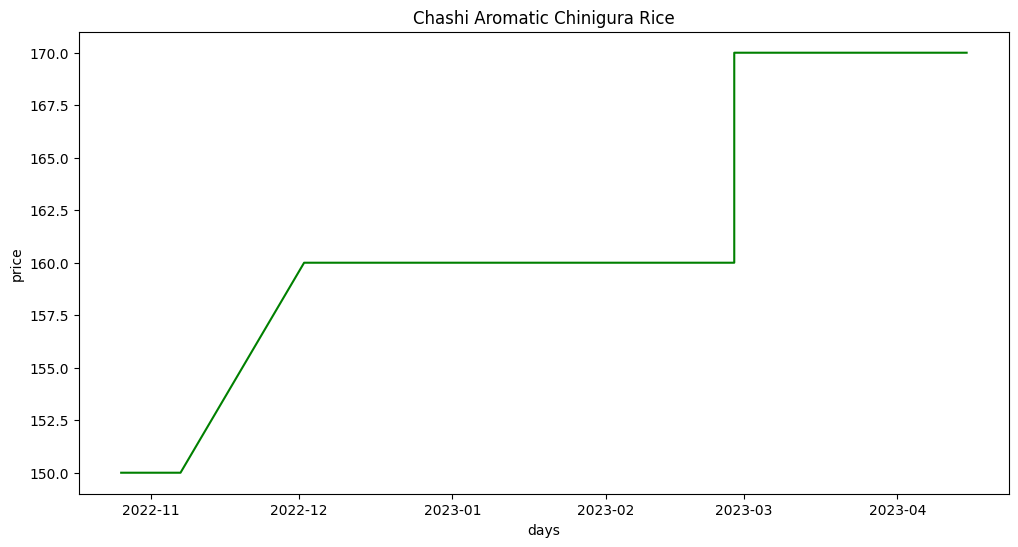

In [8]:
showLineGraph(df, "Chashi Aromatic Chinigura Rice", 1)

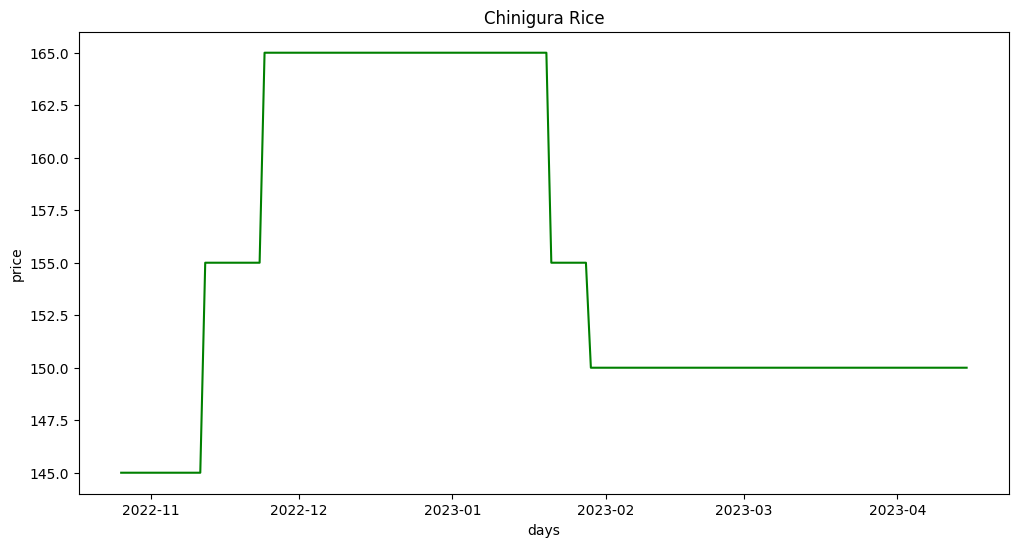

In [9]:
showLineGraph(df, "Chinigura Rice", 1)

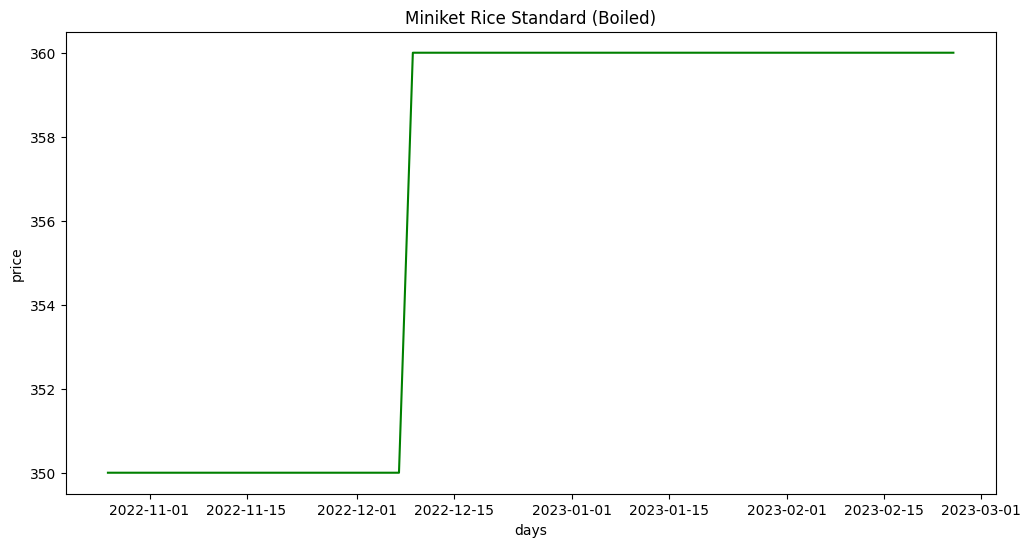

In [10]:
showLineGraph(df, "Miniket Rice Standard (Boiled)", 5)

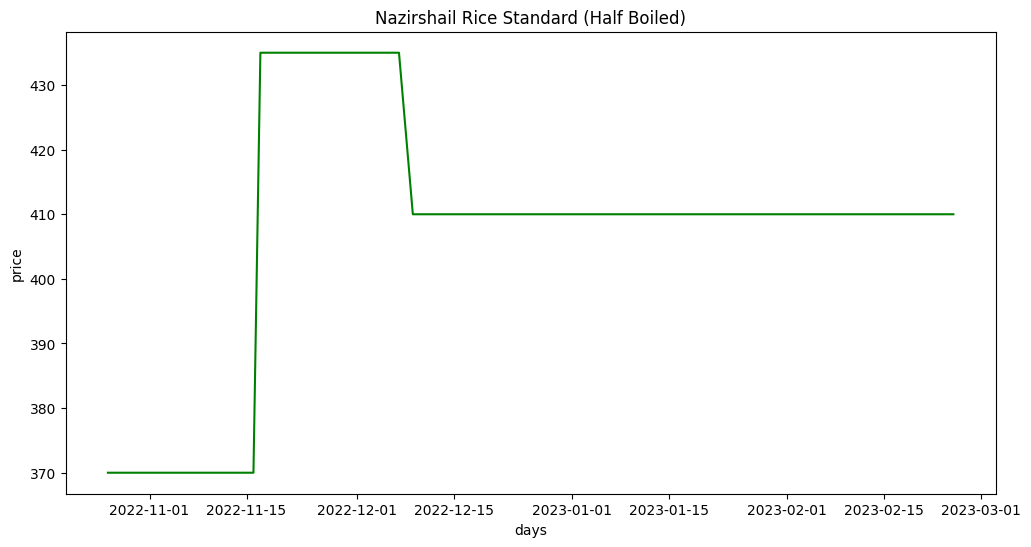

In [11]:
showLineGraph(df, "Nazirshail Rice Standard (Half Boiled)", 5)

In [12]:
# convert Nazirshail Rice Standard (Half Boiled) 5 kg to 1 kg
condition = (df['product_name'] == 'Nazirshail Rice Standard (Half Boiled)') & (df['weight_value'] == 5)
df.loc[condition,'price'] = df['price'] / 5
df.loc[condition,'weight_value'] = df['weight_value'] / 5

In [13]:
# convert Miniket Rice Standard (Boiled) 5 kg to 1 kg
condition = (df['product_name'] == 'Miniket Rice Standard (Boiled)') & (df['weight_value'] == 5)
df.loc[condition,'price'] = df['price'] / 5
df.loc[condition,'weight_value'] = df['weight_value'] / 5

In [23]:
def createMultilinePlot(dataFrames, columnNames, plotTitle = "", weight = ["1"], lineNames = []):
    f = plt.figure()
    f.set_figwidth(8)
    f.set_figheight(4)
    i = 0
    pltTitle = "Unit " + str(weight[0])
    colors = ['g', 'b', 'c']
    for dataFrame, columnName in zip(dataFrames, columnNames):
        #dataFrame.head(3)
        colValues = dataFrame[columnName]
        dateValues = dataFrame['date']
        ypoints = np.array(colValues)
        xpoints = np.array(dateValues)
        plt.plot(xpoints, ypoints, color=colors[i], label=lineNames[i])
        i += 1
        i %= len(colors)
    #plt.title(plotTitle+ "\n unit:"+ weight)
    plt.xlabel("days")
    plt.ylabel("price BDT")
    plt.legend(loc='best')
    plt.title(pltTitle)
    plt.show()

In [24]:
def showMultipleLineGraph(dataFrame, items, weights, weightRaws):
    filteredDfs = []
    itemNames = []
    df = dataFrame
    for itemName, weight in zip(items,weights):
        itemNames.append(itemName)
        filteredDf = df.loc[(df.product_name == itemName) & (df.weight_value == weight)]
        filteredDfs.append(filteredDf)
    createMultilinePlot(filteredDfs, ['price','price', 'price'], itemNames, weightRaws, items)

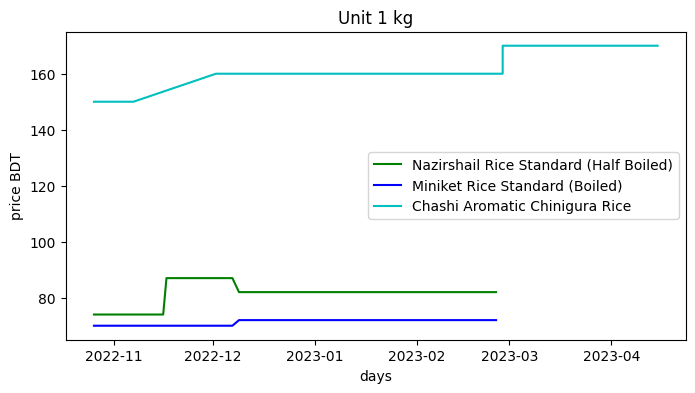

In [25]:
items = ["Nazirshail Rice Standard (Half Boiled)", "Miniket Rice Standard (Boiled)", "Chashi Aromatic Chinigura Rice"]
showMultipleLineGraph(df, items, [1,1,1], [ "1 kg","1 kg", "1 kg"])